# BVP4C for TPBVP

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/o48uhuwah8n2xww/basic_material.py?dl=0
%run basic_material

from scipy.integrate import solve_bvp, solve_ivp

Running Python: 3.9.9


$$ \ddot y = f(t,y(t)) $$
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html

In [2]:
N = 2000
y01 = 4
yf1 = -2
tf1 = 6

y02 = 10
yf2 = 0
tf2 = 2

t1 = np.linspace(0, tf1, N)
t2 = np.linspace(0, tf2, N)
A = np.array([[1, 1],[1, -1]])

In [3]:
def bc1(ya, yb):
    return np.array([ya[0] - y01, yb[0] - yf1])

def bc2(ya, yb):
    return np.array([ya[0] - y02, yb[0] - yf2])

def fun(t,S):
    return A@S

In [4]:
y1_init = np.zeros((A.shape[0],N))
y1_init[0,:] = [y01 for i in range(N)] 
y2_init = np.zeros((A.shape[0],N))
y2_init[0,:] = [y02 for i in range(N)] 

res1 = solve_bvp(fun, bc1, t1, y1_init)
res2 = solve_bvp(fun, bc2, t2, y2_init)

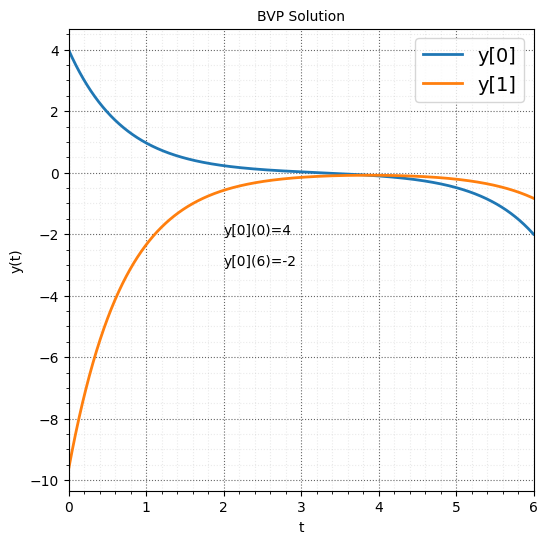

In [5]:
plt.figure(figsize = (6,6))
plt.plot(t1, res1.y[0,:],label='y[0]')
plt.plot(t1, res1.y[1,:],label='y[1]')
plt.xlabel('t')
plt.legend()
plt.text(2,-2,'y[0](0)='+str(y01))
plt.text(2,-3,'y[0]('+str(tf1)+')='+str(yf1))
plt.ylabel('y(t)')
plt.legend(fontsize=14)

plt.title('BVP Solution')
plt.xlim([min(t1),max(t1)])
nicegrid()
plt.savefig("figs/bvp1.png")
plt.show()

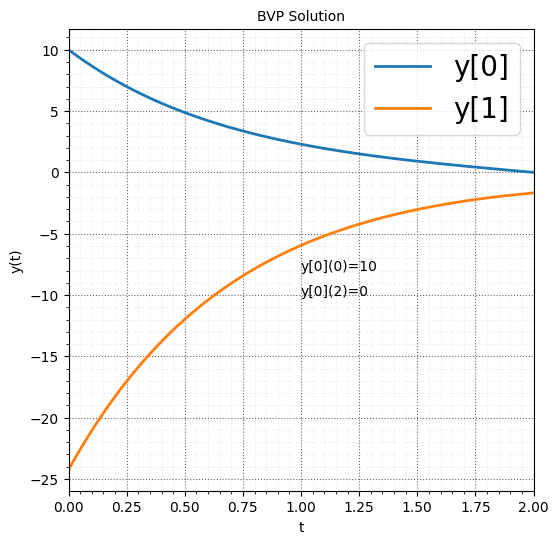

In [6]:
plt.figure(figsize = (6, 6))
plt.plot(t2, res2.y[0,:],label='y[0]')
plt.plot(t2, res2.y[1,:],label='y[1]')
plt.xlabel('t')
plt.legend()
plt.ylabel('y(t)')
plt.legend(fontsize=20)
plt.text(1,-8,'y[0](0)='+str(y02))
plt.text(1,-10,'y[0]('+str(tf2)+')='+str(yf2))

plt.title('BVP Solution')
plt.xlim([min(t2),max(t2)])
nicegrid()
plt.savefig("figs/bvp2.png")
plt.show()

## Given that BVP solution, compare to IVP solution

In [18]:
sol = solve_ivp(fun, [0, tf2], np.array([res2.y[0,0], res2.y[1,0]]), t_eval=t2)
del0 = (sol.y[0,:] - res2.y[0,:])
del1 = (sol.y[1,:] - res2.y[1,:])

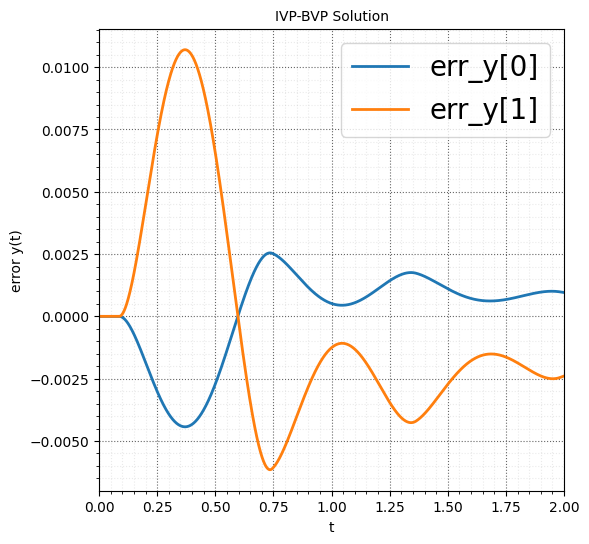

In [19]:
plt.figure(figsize = (6, 6))
plt.plot(t2, del0 ,label='err_y[0]')
plt.plot(t2, del1 ,label='err_y[1]')
plt.xlabel('t')
plt.legend()
plt.ylabel('error y(t)')
plt.legend(fontsize=20)

plt.title('IVP-BVP Solution')
plt.xlim([min(t2),max(t2)])
nicegrid()
plt.savefig("figs/bvp3.png")

plt.show()

## Mixed BC 

In [20]:
y3_init = np.zeros((A.shape[0],N))
y3_init[0,:] = [1 for i in range(N)] 

def bc3(ya, yb): # ya is IC and yb is at tf
    return np.array([ya[0] - (1), ya[1] - yb[0]])

res3 = solve_bvp(fun, bc3, t1, y3_init)

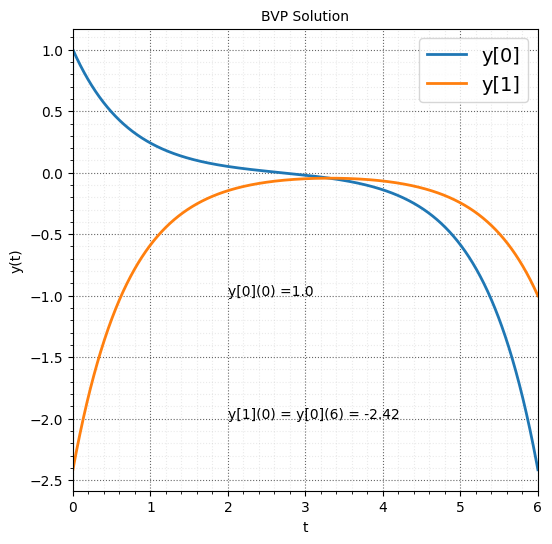

In [21]:
plt.figure(figsize = (6,6))
plt.plot(t1, res3.y[0,:],label='y[0]')
plt.plot(t1, res3.y[1,:],label='y[1]')
plt.xlabel('t')
plt.legend()
plt.text(2,-1,'y[0](0) ='+str(round(res3.y[0,0],2)))
plt.text(2,-2,'y[1](0) = y[0]('+str(tf1)+') = '+str(round(res3.y[1,0],2)))
plt.ylabel('y(t)')
plt.legend(fontsize=14)

plt.title('BVP Solution')
plt.xlim([min(t1),max(t1)])
nicegrid()
plt.savefig("figs/bvp1.png")
plt.show()